In [1]:
import pandas as pd
import numpy as np
import re
from mat2vec.processing import MaterialsTextProcessor
from pymatgen import MPRester
import tqdm

In [2]:
Elements = ['H', 'He', 'Li', 'Be', 'B', 'C', 'N', 'O', 'F', 'Ne', 'Na', 'Mg', 'Al', 'Si', 'P', 
    'S','Cl','Ar','K','Ca','Sc','Ti','V','Cr','Mn','Fe','Co','Ni','Cu','Zn',
    'Ga','Ge','As','Se','Br','Kr','Rb','Sr','Y','Zr','Nb','Mo','Tc','Ru',
    'Rh','Pd','Ag','Cd','In','Sn','Sb','Te','I','Xe','Cs','Ba','La','Ce',
    'Pr','Nd','Pm','Sm','Eu','Gd','Tb','Dy','Ho','Er','Tm','Yb','Lu','Hf',
    'Ta','W','Re','Os','Ir','Pt','Au','Hg','Tl','Pb','Bi','Po','At','Rn',
    'Fr','Ra','Ac','Th','Pa','U','Np','Pu','Am','Cm','Bk','Cf','Es','Fm',
    'Md','No','Lr','Rf','Db','Sg','Bh','Hs','Mt','Ds','Rg','Cn','Uut',
    'Fl','Uup','Lv','Uus','Uuo']

In [3]:
SuperCon = pd.read_excel('new_supercon.xlsx')

In [5]:
SuperCon['induced'] = 0
for i in tqdm.tqdm(range(len(SuperCon))):
    SuperCon['commt'].loc[i] = str(SuperCon['commt'].loc[i])
    if 'GPa' in SuperCon['commt'].loc[i]:
        SuperCon['induced'].loc[i] = True
    if 'P-induced' in SuperCon['commt'].loc[i]:
        SuperCon['induced'].loc[i] = True

  0%|                                                                                        | 0/33407 [00:00<?, ?it/s]C:\Users\giovanni\anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
100%|██████████████████████████████████████████████████████████████████████████| 33407/33407 [00:16<00:00, 2086.39it/s]


In [6]:
SuperCon = SuperCon[['element', 'tc', 'year.1', 'induced']]
SuperCon.rename(columns = {'element':'Components'}, inplace = True)
SuperCon.rename(columns = {'tc':'Tc'}, inplace = True)
SuperCon.rename(columns = {'year.1':'year'}, inplace = True)

In [8]:
for i in range(len(SuperCon)):
    if '-' in SuperCon['Components'].iloc[i]:
        SuperCon['Tc'][i] = np.NaN

for i in range(len(SuperCon)):
    if ',' in SuperCon['Components'].iloc[i]:
        SuperCon['Tc'][i] = np.NaN
        
for i in range(len(SuperCon)):
    if '+' in SuperCon['Components'].iloc[i]:
        SuperCon['Tc'][i] = np.NaN

C:\Users\giovanni\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\giovanni\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\giovanni\anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-cop

In [10]:
import re
S2 = set(Elements)

for i in range(len(SuperCon)):
    list_1 = re.findall('[A-Z][a-z]|[A-Z]', SuperCon['Components'].iloc[i])
    S1 = set(list_1)
    
    
    if len(S1) > len(S1.intersection(S2)):
        if not SuperCon['Tc'].isna().iloc[i]:
            print(SuperCon['Components'].iloc[i])

            SuperCon['Tc'].iloc[i] = np.NaN

Yb16Ba1Cu2Oz
Yb1.8Ba0.2Cu1Oz
Yb6Ba1Cu1Oz
Yb1.62La0.18Ba0.18Sr0.02Cu1Oz
Y0.4Ba0.6Cu1OX
Y0.4Ba0.6Cu1OX
Er0.5Ba0.5Cu1OX
Tm0.35Ba0.65Cu1OX
Tm0.3Ba0.7Cu1OX
Tm0.25Ba0.75Cu1OX
Tm0.2Ba0.8Cu1OX
Y1Ba2Cu3OX
Nd0.4Ba0.6Cu1OX
Nd2Ba3Cu5OX
Sm1Ba2Cu3OX
Gd2Ba3Cu5OX
Y1Ba2Cu3OX
Y1Ba2Cu3OX
Y0.8Ba1.2Cu1OX
Y0.6Ba0.9Cu1OX
Yb1.6La0.2Ba0.2Cu1Oz
Y0.4Ba0.6Cu1OX
Er1Ba2Cu3OX
Ho1Ba2Cu3OX
Gd1Ba2Cu3OX
Eu1.5Ba1.5Cu3Oz
Gd1.5Ba1.5Cu3Oz
Y1.5Ba1.5Cu3Oz
Yb1.5Ba1.5Cu3Oz
Y1Ba2Cu3F0.066Oz
Y1Ba2Cu3F0.066Oz
Y1Ba2Cu3F0.165Oz
Y1Ba2Cu3F0.016Oz
Y1Ba2Cu3F0.033Oz
Y1Ba2Cu3F0.05Oz
Y1Ba2Cu3Oz
Y1Ba2Cu3Oz
Gd1Ba2Cu3Oz
Er1Ba2Cu3OX
Dy1Ba2Cu3OX
Ho1Ba2Cu3OX
Y1Ba2Cu3OX
La1.85Sr0.15Cu0.97Ni0.03OX
Tl2Ca2Ba1Cu3OX
Tl2Ca2Ba2Cu3OX
Y1Ba2Cu3Oz
Y1Ba2Cu2.85Ti0.15Oz
Y1Ba2Cu2.7Ti0.3Oz
Y1Ba2Cu2.55Ti0.45Oz
Y1Ba2Cu2.4Ti0.6Oz
Y1Ba2Cu2.25Ti0.75Oz
Y1Ba2Cu2.1Ti0.9Oz
Bi1Sr1Ca1Cu2Oz
Bi2Sr1.8Ca1.2Cu2Oz
Bi2Sr3Ca4Cu8Oz
Bi1Sr1Ca1Cu2Oz
Gd1Ba2Cu3OX
Gd1Ba1.8Sr0.2Cu3OX
Gd1Ba1.6Sr0.4Cu3OX
Gd1Ba1.4Sr0.6Cu3Oz
Gd1Ba1.2Sr0.8Cu3Oz
Gd1Ba1Sr1Cu3Oz
Bi1Ca1Sr1Cu2Oz
Bi1Ca1Sr1Cu2Oz
Eu1B

In [11]:
SuperCon = SuperCon.dropna(axis = 0)
SuperCon = SuperCon.sort_values('Tc', ascending = False)

In [13]:
import tqdm
normalizer = MaterialsTextProcessor()
for i in tqdm.tqdm(range(len(SuperCon))):
    SuperCon['Components'].iloc[i] = normalizer.normalized_formula(SuperCon['Components'].iloc[i])

  0%|                                                                                        | 0/20678 [00:00<?, ?it/s]C:\Users\giovanni\anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
100%|██████████████████████████████████████████████████████████████████████████| 20678/20678 [00:09<00:00, 2186.61it/s]


In [15]:
grouped_df = SuperCon[SuperCon['induced'] == 0].groupby('Components')
grouped_Tc = grouped_df['Tc'].apply(list).reset_index()
grouped_year = grouped_df['year'].apply(list).reset_index()
grouped_Tc['year'] = grouped_year['year']
grouped = grouped_Tc

In [17]:
grouped['len'] = 0
grouped['mean'] = 0
grouped['weighted_mean'] = 0 
grouped['std'] = 0
grouped['rsd'] = 0
for i in tqdm.tqdm(range(len(grouped))):
    grouped['len'].iloc[i] = len(grouped['Tc'].iloc[i])
    grouped['mean'].iloc[i] = np.mean(grouped['Tc'].iloc[i])
    grouped['weighted_mean'].iloc[i] = np.dot(np.array(grouped.iloc[i]['year']) - 1950, grouped.iloc[i]['Tc'])/sum(np.array(grouped.iloc[i]['year']) - 1950)
    grouped['std'].iloc[i] = np.std(grouped['Tc'].iloc[i])
    grouped['rsd'].iloc[i] = 100*np.std(grouped['Tc'].iloc[i])/np.mean(grouped['Tc'].iloc[i])

  0%|                                                                                        | 0/13046 [00:00<?, ?it/s]C:\Users\giovanni\anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
  2%|█▎                                                                           | 217/13046 [00:00<00:17, 726.70it/s]C:\Users\giovanni\anaconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in double_scalars
  # This is added back by InteractiveShellApp.init_path()
100%|███████████████████████████████████████████████████████████████████████████| 13046/13046 [00:17<00:00, 744.40it/s]


In [18]:
grouped

,Components,Tc,year,len,mean,weighted_mean,std,rsd
0,Ag10Bi3Se20Sn7,[4.0],[2017.0],1,4.00000,4.000000,0.000000,0.000000
1,Ag10BiSe20Sn9,[5.2],[2017.0],1,5.20000,5.200000,0.000000,0.000000
2,Ag10Sn87Te100,"[1.88, 1.78]","[1973.0, 1973.0]",2,1.83000,1.830000,0.050000,2.732240
3,Ag11Bi60Pb39Se140,[1.7],[2014.0],1,1.70000,1.700000,0.000000,0.000000
4,Ag13Al7,[0.1],[1970.0],1,0.10000,0.100000,0.000000,0.000000
...,...,...,...,...,...,...,...,...
13041,W801Zr199,[2.01],[1970.0],1,2.01000,2.010000,0.000000,0.000000
13042,Y,"[2.7, 2.5]","[1970.0, 1974.0]",2,2.60000,2.590909,0.100000,3.846154
13043,Zn,"[0.857, 0.855, 0.85, 0.825]","[1971.0, 1967.0, 1966.0, 1958.0]",4,0.84675,0.850516,0.012814,1.513264
13044,Zn2Zr,"[0.6, 0.29]","[2005.0, 2001.0]",2,0.44500,0.450849,0.155000,34.831461


In [19]:
grouped2 = grouped[grouped['len'] >= 5]
grouped2 = grouped2[grouped2['rsd'] <= 20]

In [25]:
df = pd.read_excel('SHAP.xlsx', index_col = 0)
features = df.iloc[:30]

In [27]:
def get_compostion(c): # Function to get compositions from chemical formula using pymatgen
    try:
        return Composition(c)
    except:
        return None

def featurizing(data,property_interest=None):

    # Featurizer
    f =  MultipleFeaturizer([cf.Stoichiometry(), cf.ElementProperty.from_preset("magpie"),
                             cf.ValenceOrbital(props=['avg']), cf.IonProperty(fast=True)])

    # Inputs
    data['composition'] = [get_compostion(mat) for mat in data.Components]
    featurized_data = pd.DataFrame(f.featurize_many(data['composition'], ignore_errors=True), columns=f.feature_labels(), index=data['Components'])
    if property_interest:
        featurized_data[property_interest] = data[property_interest].values
    return featurized_data

In [28]:
from matminer.featurizers.base import MultipleFeaturizer
from matminer.featurizers import composition as cf
from pymatgen import Composition

C:\Users\giovanni\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.neighbors.unsupervised module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [29]:
reduced = grouped2[['Components', 'mean']]

In [30]:
Data_train = featurizing(reduced)

MultipleFeaturizer:   0%|          | 0/296 [00:00<?, ?it/s]

In [31]:
Data_train['Tc'] = reduced.set_index('Components')['mean']

In [33]:
Data = Data_train[list(features.index)]

In [34]:
Data['Tc'] = reduced.set_index('Components')['mean']

In [35]:
data = Data.sort_values(by = 'Tc', ascending = False)

In [36]:
from sklearn.pipeline import Pipeline
import numpy as np
from sklearn.model_selection import GridSearchCV
import pandas as pd
import sklearn
from sklearn import preprocessing
from sklearn.model_selection import KFold
from sklearn.feature_selection import SelectPercentile, SelectKBest, f_regression, chi2, VarianceThreshold
from sklearn.base import TransformerMixin, BaseEstimator
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import r2_score
from sklearn.ensemble import ExtraTreesRegressor
from pymatgen.analysis import magnetism

In [37]:
'''
Class to be imported in pipeline (below) for dropping the most correlated columns, preventing data leakage.
'''

class MyDecorrelator(BaseEstimator, TransformerMixin): 
    
    def __init__(self, threshold):
        self.threshold = threshold
        self.correlated_columns = None

    def fit(self, X, y=None):
        correlated_features = set()  
        X = pd.DataFrame(X)
        corr_matrix = X.corr()
        for i in range(len(corr_matrix.columns)):
            for j in range(i):
                if abs(corr_matrix.iloc[i, j]) > self.threshold: # we are interested in absolute coeff value
                    colname = corr_matrix.columns[i]  # getting the name of column
                    correlated_features.add(colname)
        self.correlated_features = correlated_features
        return self

    def transform(self, X, y=None, **kwargs):
        return (pd.DataFrame(X)).drop(labels=self.correlated_features, axis=1)

In [38]:
etr = ExtraTreesRegressor(random_state = 0)

pipe = Pipeline([
    ('decorrelation', MyDecorrelator(0.9)), 
    ('threshold', VarianceThreshold(threshold = 0)), 
    ('feature_selector', SelectPercentile(f_regression)), 
    ('etr', etr)
], verbose = 1)

In [39]:
param_grid = {
    "etr__n_estimators": [100, 250, 500],              #Tune the number of estimators
    "etr__max_features": [1, 0.75 ,0.5],                 #Tune the number of features to consider when looking for the best split
    "feature_selector__percentile": [100, 75, 50]           #Tune the percentage of features to retain in terms of f_regression score
}
search = GridSearchCV(pipe, param_grid, n_jobs=1, verbose = 1, cv = 5)

In [40]:
train_df, test_df = train_test_split(data, test_size=0.2, random_state=0)

In [41]:
len(data)

296

In [42]:
search.fit(train_df.iloc[:, :-1], train_df.iloc[:, -1])

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[Pipeline] ..... (step 1 of 4) Processing decorrelation, total=   0.1s
[Pipeline] ......... (step 2 of 4) Processing threshold, total=   0.0s
[Pipeline] .. (step 3 of 4) Processing feature_selector, total=   0.0s
[Pipeline] ............... (step 4 of 4) Processing etr, total=   0.1s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[Pipeline] ..... (step 1 of 4) Processing decorrelation, total=   0.0s
[Pipeline] ......... (step 2 of 4) Processing threshold, total=   0.0s
[Pipeline] .. (step 3 of 4) Processing feature_selector, total=   0.0s
[Pipeline] ............... (step 4 of 4) Processing etr, total=   0.1s
[Pipeline] ..... (step 1 of 4) Processing decorrelation, total=   0.0s
[Pipeline] ......... (step 2 of 4) Processing threshold, total=   0.0s
[Pipeline] .. (step 3 of 4) Processing feature_selector, total=   0.0s
[Pipeline] ............... (step 4 of 4) Processing etr, total=   0.1s
[Pipeline] ..... (step 1 of 4) Processing decorrelation, total=   0.0s
[Pipeline] ......... (step 2 of 4) Processing threshold, total=   0.0s
[Pipeline] .. (step 3 of 4) Processing feature_selector, total=   0.0s
[Pipeline] ............... (step 4 of 4) Processing etr, total=   0.1s
[Pipeline] ..... (step 1 of 4) Processing decorrelation, total=   0.0s
[Pipeline] ......... (step 2 of 4) Processing threshold, total=   0.0s
[Pipel

[Parallel(n_jobs=1)]: Done 135 out of 135 | elapsed:   39.1s finished


[Pipeline] ............... (step 4 of 4) Processing etr, total=   0.6s


GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('decorrelation',
                                        MyDecorrelator(threshold=0.9)),
                                       ('threshold',
                                        VarianceThreshold(threshold=0)),
                                       ('feature_selector',
                                        SelectPercentile(percentile=10,
                                                         score_func=<function f_regression at 0x0000018FCB052F78>)),
                                       ('etr',
                                        ExtraTreesRegressor(bootstrap=False,
                                                            ccp_alpha=0.0,
                                                            criterion='mse',
                                                            max_d...
                                                            min_weight

In [43]:
search.best_params_

{'etr__max_features': 0.5,
 'etr__n_estimators': 500,
 'feature_selector__percentile': 100}

In [45]:
from mat2vec.processing import MaterialsTextProcessor
text_processor = MaterialsTextProcessor()

In [46]:
text_processor.process("Cu0.9Pb9.1(PO4)6O")

(['Cu9O250P60Pb91'], [('Cu0.9Pb9.1(PO4)6O', 'Cu9O250P60Pb91')])

In [47]:
f = pd.DataFrame(['Cu9O250P60Pb91'], columns = ['Components'])
d = pd.DataFrame(['CuO25P6Pb9'], columns = ['Components'])
b = featurizing(f)
a = featurizing(d)

MultipleFeaturizer:   0%|          | 0/1 [00:00<?, ?it/s]

MultipleFeaturizer:   0%|          | 0/1 [00:00<?, ?it/s]

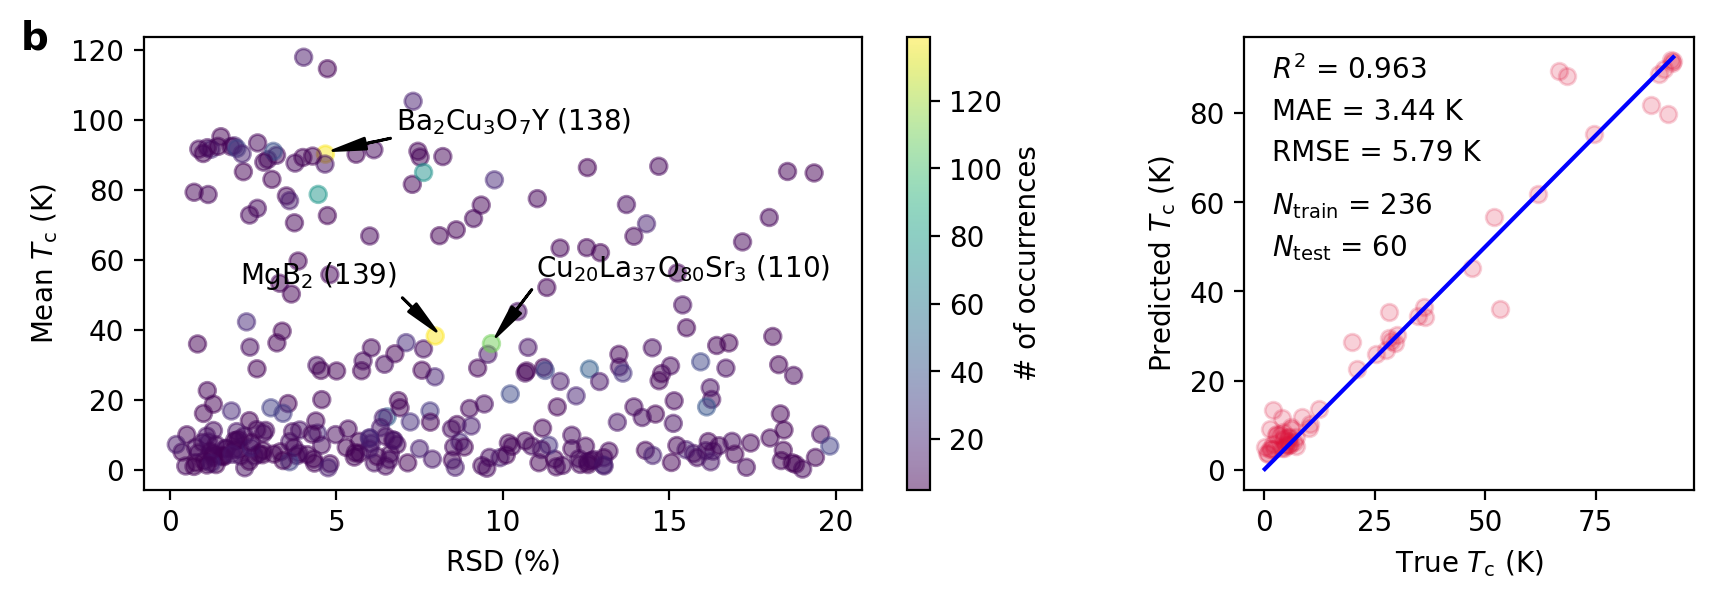

In [49]:
import matplotlib.pyplot as plt
from matplotlib import gridspec

fig = plt.figure(1, figsize=(10, 3), dpi = 200)

gs = gridspec.GridSpec(1, 2, width_ratios=[3, 1.5], wspace=.3) 
ax0 = plt.subplot(gs[0])
g = ax0.scatter(grouped2['rsd'], grouped2['mean'], c=grouped2['len'], cmap='viridis', alpha = .5, )
fig.colorbar(g, ax=ax0, label = '# of occurrences')
ax0.set_ylabel(r'Mean $T_{\rm{c}}$ (K)')
ax0.set_xlabel('RSD (%)')
ax0.annotate(r'MgB$_2$ (139)', xy=(8.0, 39.58058), xytext=(2.1, 53),
            arrowprops=dict(facecolor='black', shrink=0.000005, width = .1, headwidth=4),
            )
ax0.annotate(r'Ba$_2$Cu$_3$O$_7$Y (138)', xy=(4.9, 91.2), xytext=(6.8, 97),
            arrowprops=dict(facecolor='black', shrink=0.000005, width = .1, headwidth=4),
            )
ax0.annotate(r'Cu$_{20}$La$_{37}$O$_{80}$Sr$_3$ (110)', xy=(9.8, 38.014821), xytext=(11, 55.014821),
            arrowprops=dict(facecolor='black', shrink=0.000005, width = .1, headwidth=4),
            )

ax1 = plt.subplot(gs[1])
ax1.scatter(test_labels, test_predictions, c="crimson", alpha=0.2)
p1 = max(max(test_predictions), max(test_labels))
p2 = min(min(test_predictions), min(test_labels))
ax1.plot([p1, p2], [p1, p2], "b-")
ax1.annotate(
    "$R^2$ = %0.3f" % r2,
    xy=(0.02 * delta, 0.95 * delta),
    xytext=(0.02 * delta, 0.95 * delta),
)
ax1.annotate(
    "MAE = %0.2f K" % mae,
    xy=(0.02 * delta, 0.85 * delta),
    xytext=(0.02 * delta, 0.85 * delta),
)
ax1.annotate(
    "RMSE = %0.2f K" % rmse,
    xy=(0.02 * delta, 0.75 * delta),
    xytext=(0.02 * delta, 0.75 * delta),
)
ax1.set_xlabel("True $T_\mathrm{c}$ (K)")
ax1.set_ylabel("Predicted $T_\mathrm{c}$ (K)")

ax1.annotate(r'$N_{\rm{train}}$ = %0.0f' % len(train_df), xy=(0.02 * delta, 0.62 * delta), xytext=(0.02 * delta, 0.62 * delta),
            )
ax1.annotate(r'$N_{\rm{test}}$ = %0.0f' % len(test_df), xy=(0.02 * delta, 0.52 * delta), xytext=(0.02 * delta, 0.52 * delta),
            )
ax0.annotate(r'$\mathbf{b}$', xy=(0, 0), xytext=(-4.5, 120), fontsize = 14
            )
plt.show()

In [48]:
print(search.predict(b[list(features.index)])
, search.predict(a[list(features.index)]))

[8.99854911] [9.09910689]


In [55]:
grouped2.sort_values(by = 'len', ascending = False)

,Components,Tc,year,len,mean,weighted_mean,std,rsd
2448,B2Mg,"[40.5, 40.36, 40.25, 40.23, 40.21, 40.2, 40.2,...","[2005.0, 2004.0, 2001.0, 2001.0, 2001.0, 2001....",139,38.204820,38.198458,3.045966,7.972727
4496,Ba2Cu3O7Y,"[95.5, 95.0, 94.3, 94.0, 93.4, 93.15, 93.0, 93...","[1989.0, 1988.0, 1992.0, 1988.0, 1990.0, 1988....",138,90.186232,90.158730,4.214736,4.673370
8764,Cu20La37O80Sr3,"[45.3, 44.0, 44.0, 43.0, 42.0, 40.0, 39.3, 39....","[2009.0, 2010.0, 2000.0, 1999.0, 1998.0, 1988....",110,36.015091,36.104893,3.479524,9.661294
4508,Ba2Cu4O8Y,"[83.0, 82.9, 82.5, 82.0, 82.0, 81.9, 81.8, 81....","[1990.0, 1990.0, 1989.0, 1999.0, 1995.0, 1990....",76,78.669737,78.606790,3.506536,4.457287
6127,Bi2CaCu2O8Sr2,"[99.0, 98.0, 95.0, 93.7, 93.1, 93.0, 93.0, 93....","[1996.0, 1989.0, 1994.0, 1994.0, 2003.0, 1989....",73,84.950685,84.965959,6.475541,7.622707
...,...,...,...,...,...,...,...,...
1607,As50Ba18Fe50K7,"[36.7, 34.0, 33.1, 31.8, 30.0]","[2008.0, 2012.0, 2011.0, 2008.0, 2009.0]",5,33.120000,33.121141,2.239107,6.760589
7123,CSi,"[1.45, 1.45, 1.45, 1.45, 1.4]","[2008.0, 2008.0, 2008.0, 2007.0, 2008.0]",5,1.440000,1.439965,0.020000,1.388889
1665,As50F7Fe50La50O43,"[19.0, 18.0, 17.8, 12.9, 11.9]","[2008.0, 2009.0, 2009.0, 2011.0, 2017.0]",5,15.920000,15.784211,2.919863,18.340848
7263,Ca2Cu4O14PbSr4Tl,"[85.0, 85.0, 84.5, 82.0, 78.4]","[2005.0, 1989.0, 1992.0, 1994.0, 1997.0]",5,82.980000,82.959471,2.545899,3.068087
